# Dimensionality Reduction

In [6]:
from __future__ import division,print_function,unicode_literals

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


np.random.seed(42)

In [12]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

X = mnist.data
y = mnist.target

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [34]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)

d = np.argmax(cumsum >= 0.95) + 1  # 95 variance explained
print('No of components require to explain 95% variance {}'.format(d))

No of components require to explain 95% variance 154


In [39]:
# Reduced
pca_reduced = PCA(n_components = 0.95)
pca_reduced.fit(X_train)
print('No of components require to explain 95% variance {}'.format(pca_reduced.n_components_))

No of components require to explain 95% variance 154


In [42]:
np.sum(pca_reduced.explained_variance_ratio_)

0.9504280703835113

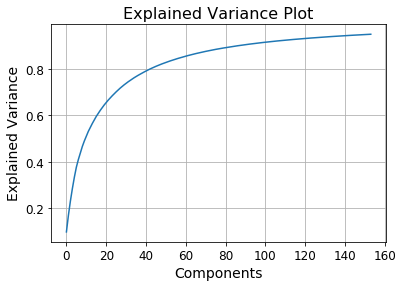

In [56]:
plt.plot(np.cumsum(pca_reduced.explained_variance_ratio_));
plt.xlabel('Components')
plt.ylabel('Explained Variance')
plt.grid()
plt.title('Explained Variance Plot',fontdict=dict(size=16));